In [9]:
import polars as pl

# 读取数据
data = pl.read_parquet("hourly_data.pa")

# 排序数据
df = data.sort('open_time').sort("symbol")

# 计算每个时刻的价格变动
df = df.with_columns([
    (pl.col("close") - pl.col("open")).alias("price_change"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算价格变动与成交量的比率
df = df.with_columns([
    (pl.col("price_change") / pl.col("quote_volume")).alias("price_change_quote_volume_ratio")
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,price_change,return,price_change_quote_volume_ratio
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",-0.0218,null,-7.6526e-10
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.0082,0.018182,4.4674e-10
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",-0.0039,-0.008057,-1.9309e-10
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",-0.0257,-0.056641,-1.2731e-9
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",-0.0141,-0.032814,-1.2394e-9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.0002,0.001339,1.7855e-9
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.0,0.0,0.0
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",-0.0006,-0.004011,-9.7061e-9


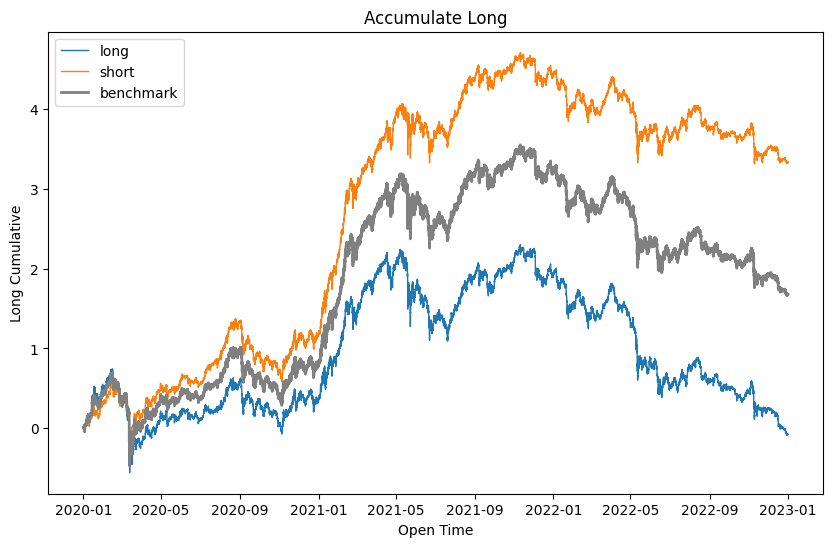

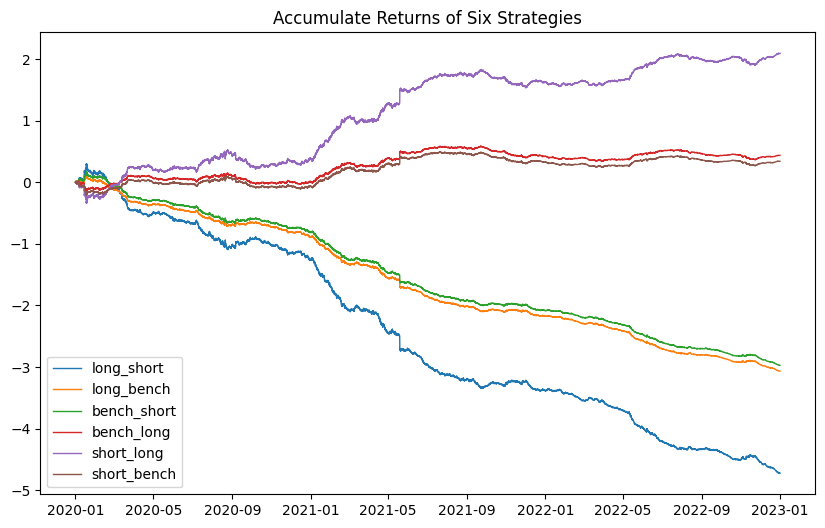

long: 
ann_return = -0.0256  sharpe = -0.0232  maxdd = 0.7451  calmar_ratio = -0.0344  

short: 
ann_return = 1.1088  sharpe = 1.0194  maxdd = 0.6574  calmar_ratio = 1.6866  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.5724  sharpe = -5.5557  maxdd = 3.8663  calmar_ratio = -0.4067  

long_bench: 
ann_return = -1.0212  sharpe = -7.147  maxdd = 2.8564  calmar_ratio = -0.3575  

bench_long: 
ann_return = 0.1452  sharpe = 1.016  maxdd = 0.1662  calmar_ratio = 0.8737  

short_long: 
ann_return = 0.6964  sharpe = 2.4606  maxdd = 0.3377  calmar_ratio = 2.062  

short_bench: 
ann_return = 0.1133  sharpe = 0.7967  maxdd = 0.2158  calmar_ratio = 0.5247  

bench_short: 
ann_return = -0.9893  sharpe = -6.9587  maxdd = 2.6855  calmar_ratio = -0.3684  



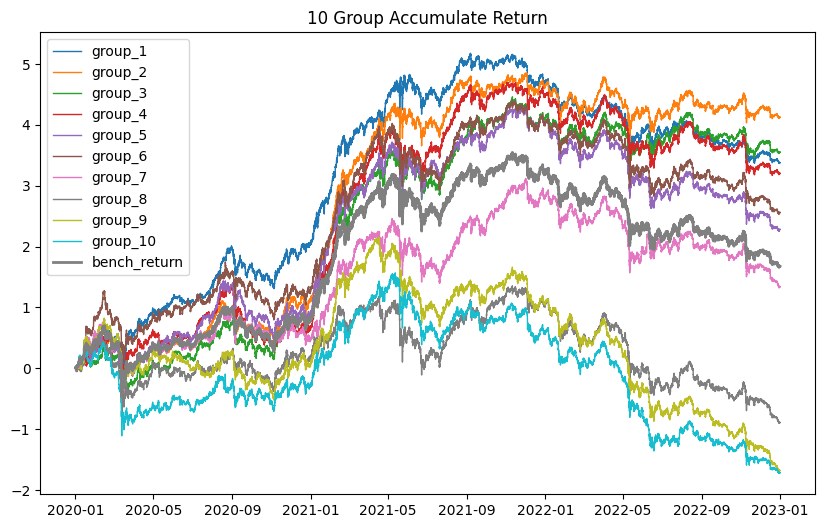

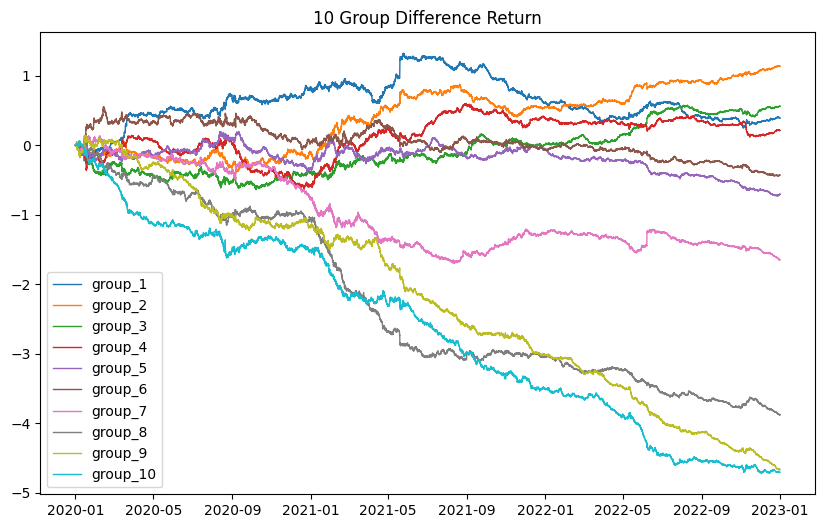

group_1: 
ann_return = 1.1247  sharpe = 1.0494  maxdd = 0.5845  calmar_ratio = 1.924  

group_2: 
ann_return = 1.373  sharpe = 1.2445  maxdd = 0.5908  calmar_ratio = 2.3237  

group_3: 
ann_return = 1.1825  sharpe = 1.0373  maxdd = 0.796  calmar_ratio = 1.4855  

group_4: 
ann_return = 1.0656  sharpe = 0.9111  maxdd = 0.6359  calmar_ratio = 1.6756  

group_5: 
ann_return = 0.7598  sharpe = 0.6471  maxdd = 0.7698  calmar_ratio = 0.987  

group_6: 
ann_return = 0.8517  sharpe = 0.7206  maxdd = 0.5204  calmar_ratio = 1.6367  

group_7: 
ann_return = 0.4444  sharpe = 0.3754  maxdd = 0.7041  calmar_ratio = 0.6312  

group_8: 
ann_return = -0.2967  sharpe = -0.2565  maxdd = 0.9581  calmar_ratio = -0.3097  

group_9: 
ann_return = -0.5593  sharpe = -0.491  maxdd = 1.2181  calmar_ratio = -0.4592  

group_10: 
ann_return = -0.5729  sharpe = -0.5123  maxdd = 1.2824  calmar_ratio = -0.4467  

-----------------------------------------
group_difference_1: 
ann_return = 0.1291  sharpe = 0.3601  maxd

In [10]:
factors = df.select(['open_time', 'symbol', 'price_change_quote_volume_ratio'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()